In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
df= pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'height')

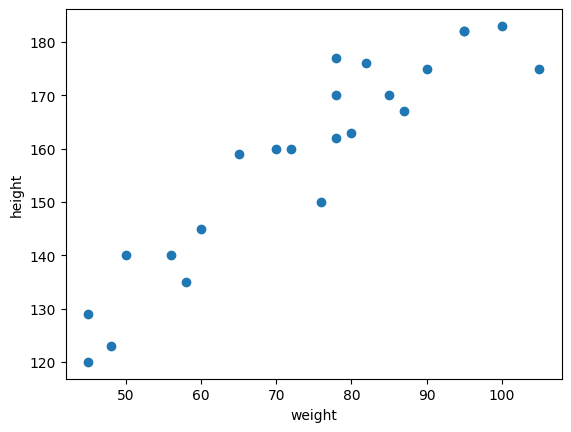

In [3]:
plt.scatter(df['Weight'],df["Height"])
plt.xlabel('weight')
plt.ylabel('height')

In [8]:
X=df[['Weight']]
y=df['Height']



In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [10]:
X.shape

(23, 1)

In [11]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [13]:
scaler = StandardScaler()

In [14]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

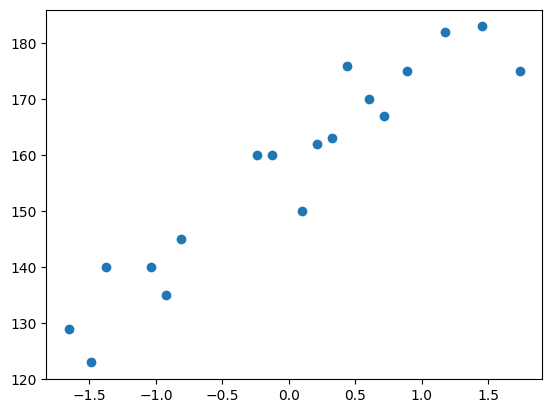

In [15]:
plt.scatter(X_train,y_train)

In [20]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

print("The slope or coefficient of weight is ",regressor.coef_)
print("Intercept:",regressor.intercept_)


The slope or coefficient of weight is  [17.03440872]
Intercept: 157.5


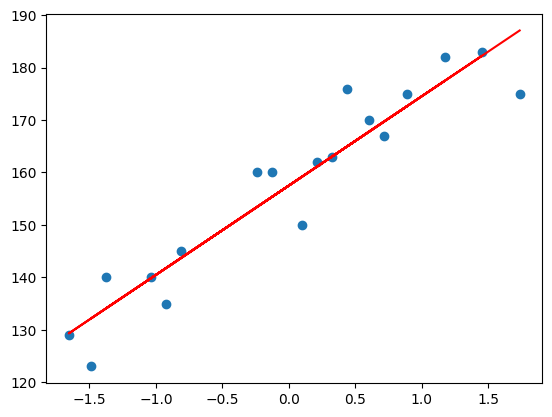

In [22]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'r')

### prediction of train data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_train =157.5 + 17.03(X_train)
          
### prediction of test data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test =157.5 + 17.03(X_test)


In [30]:
y_pred_test=regressor.predict(X_test)

In [26]:
y_pred_test,y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

## Performance Metrics

## MSE,MAE,RMSE
## R square and adjusted R square

In [36]:
from sklearn.metrics import mean_squared_error,mean_absolute_error , r2_score

In [35]:
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
RMSE = np.sqrt(mse)

print(mse,mae,RMSE)

109.77592599051664 9.822657814519232 10.477400726827081


## R square
Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares

In [38]:
score = r2_score(y_test,y_pred_test)
score

0.776986986042344

## Adjusted R Square
**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [39]:

#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252

In [46]:
## new data point weight is 80

scaled_weight = scaler.transform([[80]])
scaled_weight

regressor.predict([scaled_weight[0]])

c:\Users\MONISH\anaconda3\envs\myenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([163.01076266])